In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv("C:/Users/Chinmayi/Downloads/Project/yulu_dataset.txt")

In [98]:
df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

# 1. Understand the key factors that affects the Yulu bike demand and also the extent of impact.

## Concept Used:
### Bi-Variate Analysis
### 2-sample t-test: testing for difference across populations
### ANNOVA
### Chi-square
### Correlation test

In [6]:
# Let us know the no. of columns and rows in this table
df.shape

(10886, 12)

In [7]:
# Let's find out basic range for numeric data types using describe
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [99]:
# Let us find the datatypes of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [100]:
# We will convert the data type of certain columns
df["datetime"] = df["datetime"].astype("datetime64[ns]")
for x in ["season", "holiday", "workingday", "weather"]:
    df[x] = df[x].astype("category")

In [101]:
# New updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [102]:
# Let us find out null values
df.isna().sum()
# No null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [38]:
# Count of different seasons
df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [40]:
# Count of different weather
df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [50]:
# statistical summary of the table
df.describe()

datetime         temp         atemp      humidity  \
count                          10886  10886.00000  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968     20.23086     23.655084     61.886460   
min              2011-01-01 00:00:00      0.82000      0.760000      0.000000   
25%              2011-07-02 07:15:00     13.94000     16.665000     47.000000   
50%              2012-01-01 20:30:00     20.50000     24.240000     62.000000   
75%              2012-07-01 12:45:00     26.24000     31.060000     77.000000   
max              2012-12-19 23:00:00     41.00000     45.455000    100.000000   
std                              NaN      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

<Axes: xlabel='temp', ylabel='Density'>

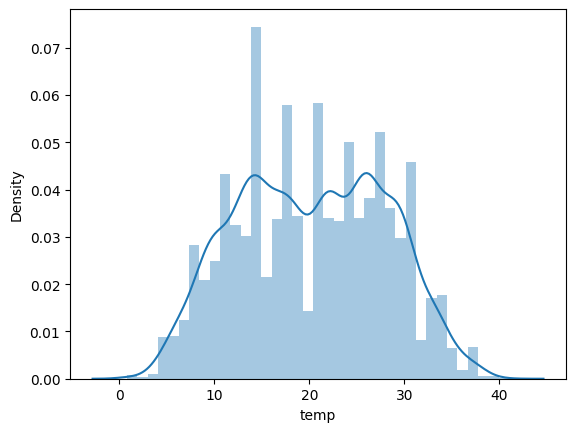

In [51]:
# Univariate analysis of temperature
sns.distplot(df['temp'])

<Axes: xlabel='atemp', ylabel='Count'>

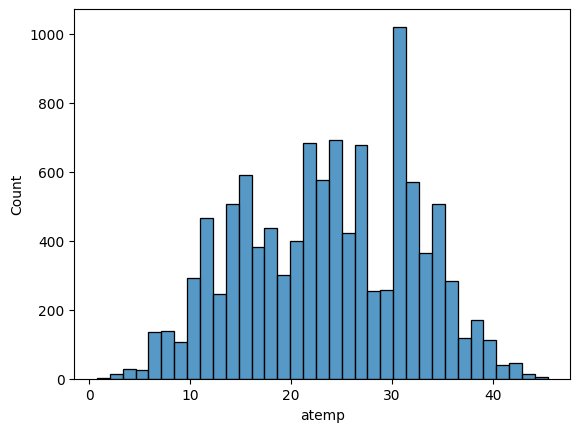

In [52]:
# Univariate analysis of atemp
sns.histplot(df["atemp"])

<Axes: xlabel='count', ylabel='Density'>

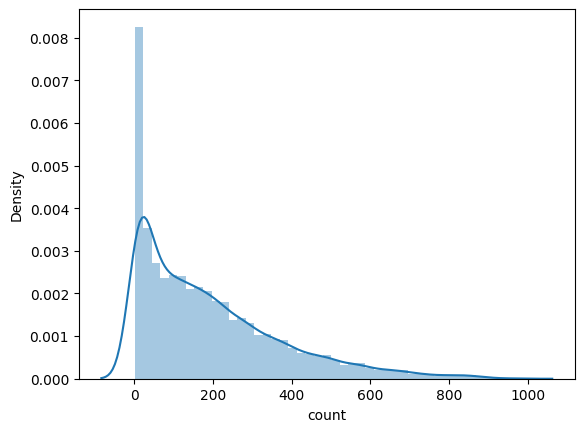

In [103]:
# Univariate analysis of ridership
sns.distplot(df["count"])

In [104]:
def outliers(arr):
    q1 = np.percentile(arr,25)
    q2 = np.percentile(arr,75)
    iqr = 1.5*(q2 - q1)
    low = max(q1 - iqr,0)
    high = q2 + iqr
    outliers = arr[(arr>high) | (arr<low)]
    return outliers

Series([], Name: temp, dtype: float64)

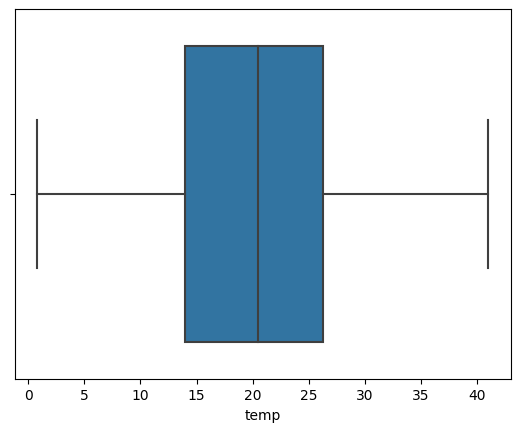

In [105]:
#Outliers in "temp" column
sns.boxplot(x = df["temp"])
sns.stripplot(x = outliers(df["temp"]), color = "red")
outliers(df["temp"])
# We observe that there are no outliers.

<Axes: xlabel='humidity'>

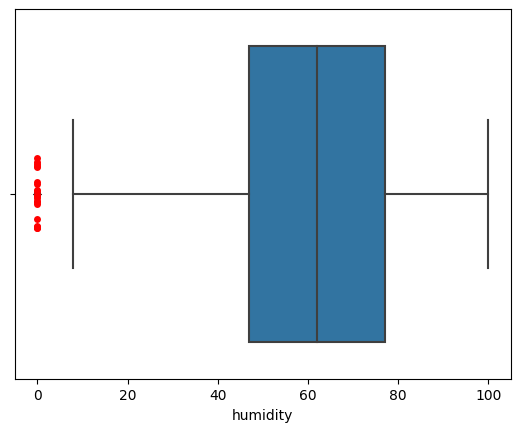

In [106]:
# Outliers in "humidity" column
sns.boxplot(x = df["humidity"])
sns.stripplot(x = outliers(df["humidity"]), color = "red")
# We find out that there are few outliers below the lower whisker.

<Axes: xlabel='count'>

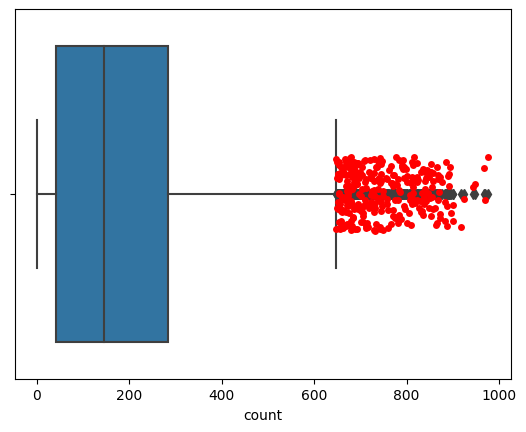

In [16]:
#Outliers in total ridership
sns.boxplot(x = df["count"])
sns.stripplot(x = outliers(df["count"]), color = "red")
# We observe that there are a lot of outliers in the ridership column.

<Axes: xlabel='season', ylabel='count'>

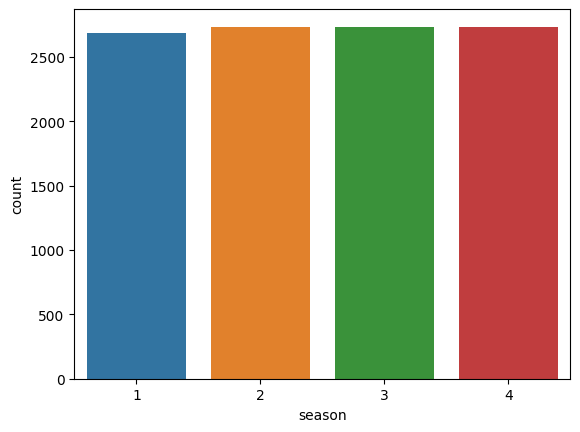

In [62]:
# Bivariate analysis of Count of different seasons
sns.countplot(data = df, x = df["season"])

<Axes: xlabel='workingday', ylabel='count'>

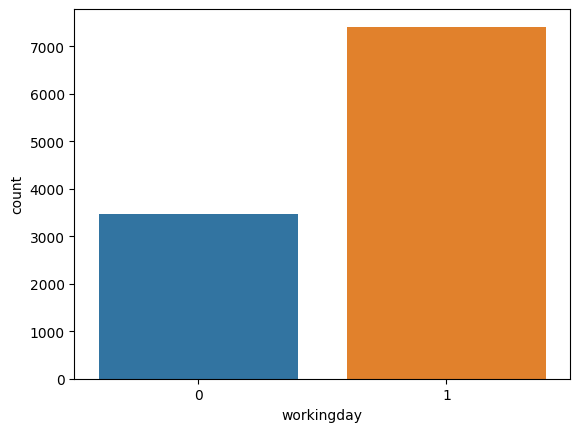

In [67]:
# Count of occurences of work day
sns.countplot(data = df, x = df["workingday"])

<Axes: xlabel='weather', ylabel='count'>

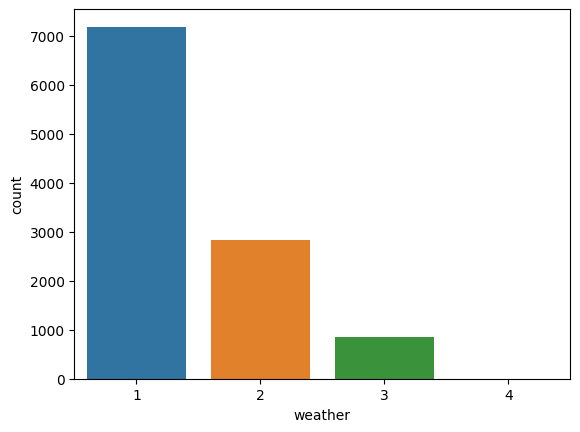

In [68]:
# Bivariate analysis of count of different weather days.
sns.countplot(data = df, x = df["weather"])

<Axes: xlabel='temp', ylabel='atemp'>

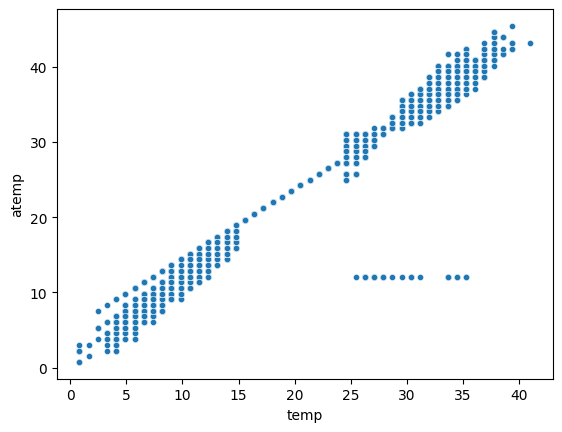

In [74]:
# Bivariate analysis to understand the dependence of temp and atemp
sns.scatterplot(x = df["temp"], y = df["atemp"], s = 20)

<Axes: xlabel='season'>

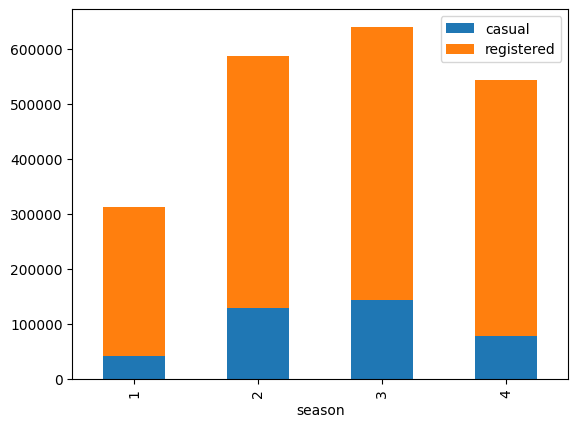

In [76]:
# Let us see how many casual and registered customers have used yulu across seasons.
df.groupby("season")[["casual", "registered"]].sum().plot(kind = "bar", stacked = True)

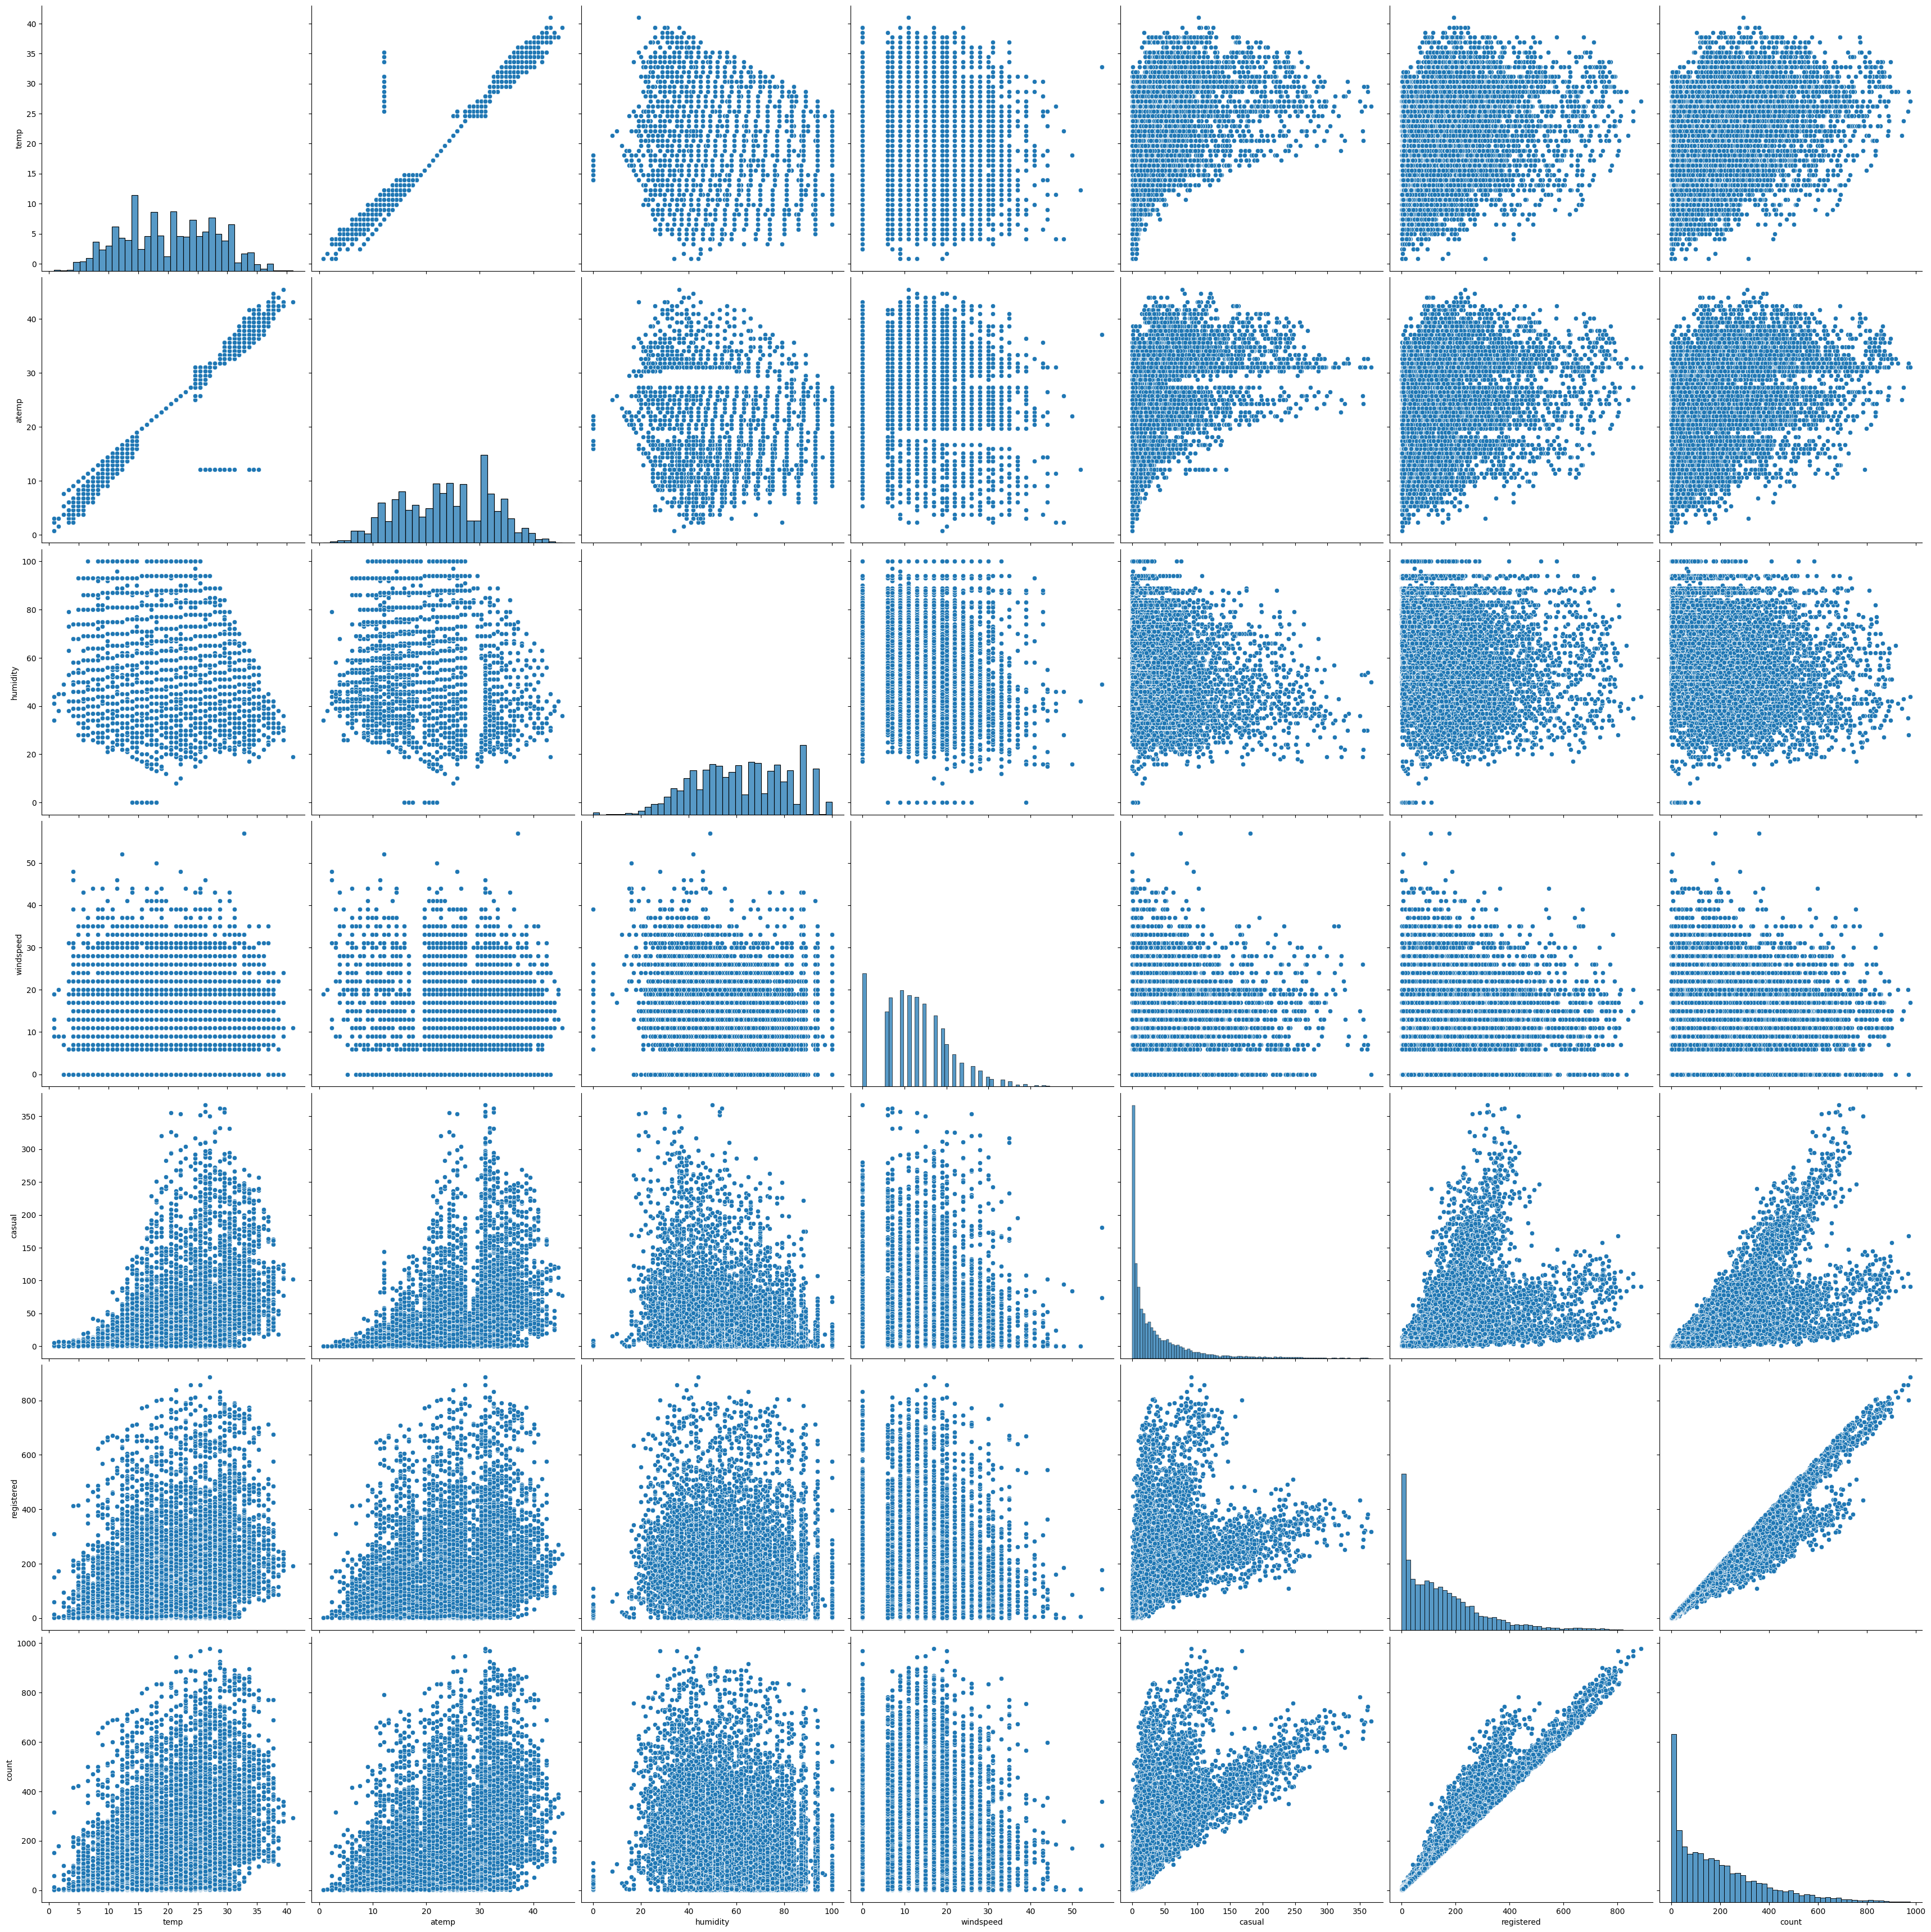

In [80]:
sns.pairplot(df, size = 5)

<Axes: >

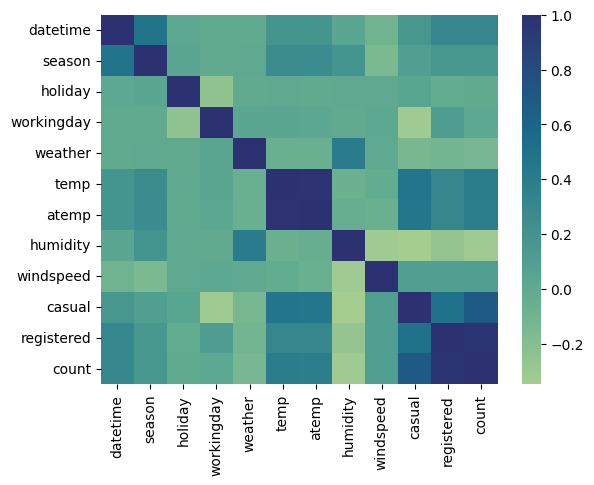

In [10]:
sns.heatmap(df.corr(), cmap ="crest")
# 1. Humidity has a negative correlation with ridership
# 2. Temperature has a mild positive correlation with ridership.
# 3. Temp and atemp has strong correlation.
# 4. Casual/registered user have strong correlation with total count.

# 2. Hypothesis Testing

## 1. Does working day has any effect on the no. of cycles rented?

In [22]:
# First let us explore the two datasets - one for no. of cycles rented on working day 
# and when the no. of cycles rented on non-working day.
a = df.loc[df["workingday"]==1,["count"]]
b = df.loc[df["workingday"]==0,["count"]]

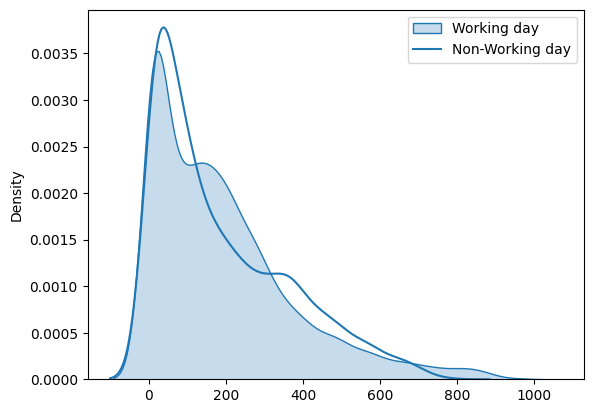

In [38]:
sns.kdeplot(a, label = "Working day",fill =True, color = "red")
sns.kdeplot(b, label = "Non-Working day", color = "blue")
plt.legend()

### We observe more people using during non-working day, to test this hypothesis we will be using t-test with a p-value of 0.05.

### Assumptions: Lets investigate whether the curve follows normal distribution or not. We will be using Q-Q test to assess the claim.

In [39]:
from scipy.stats import probplot

((array([-3.73592685, -3.50654119, -3.38040512, ...,  3.38040512,
          3.50654119,  3.73592685]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (172.21129312911782, 193.01187263896384, 0.9329510592827178))

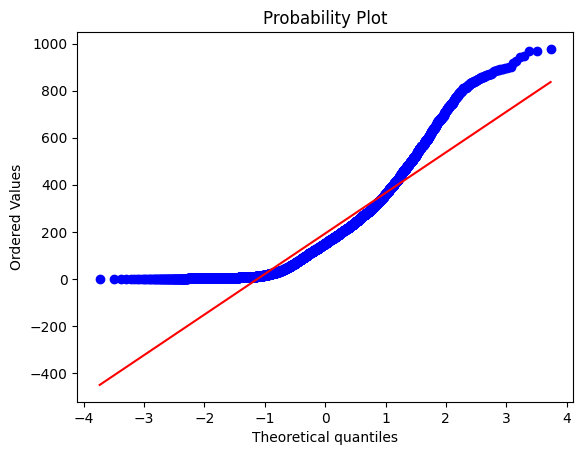

In [51]:
probplot(a["count"], plot = plt)

### We observe that the data doesn't follow normal distribution. Next let us check if the variance of the two curves are same or different using levene's test.

In [52]:
from scipy.stats import levene

In [54]:
# H0 : Both the sample have same variance.
# Ha : Samples have different variance.
# Significance level : 0.05
levene(a["count"],b["count"])
## We observe that p_value> significance level, hence we fail to reject null hypothesis.

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

## Even though the two curves are not normally distributed, let us perform t-test analysis.

### Null Hypothesis: Number of people using the cycles on working day and non-working day is the same.

### Alternate Hypothesis: Number of people using the cycles on non-working day is more than working day.

### Test: T-test (for independent samples)

### significance level: 0.05

In [55]:
from scipy.stats import ttest_ind

In [61]:
tstat, p = ttest_ind(a["count"], b["count"], alternative = 'less')
if p<0.05:
    print(f"p = {p}: Reject null hypothesis")
else :
    print(f"p = {p}: failed to reject null hypothesis")

p = 0.8867759788681933: failed to reject null hypothesis


## We conclude that there is no significant difference between the ridership numbers during working days v/s non-working days.

## 2. Does seasonality have any effect on ridership?

In [65]:
# First let us explore the datasets 
a = df.loc[df["season"]==1,["count"]]["count"]
b = df.loc[df["season"]==2,["count"]]["count"]
c = df.loc[df["season"]==3,["count"]]["count"]
d = df.loc[df["season"]==4,["count"]]["count"]

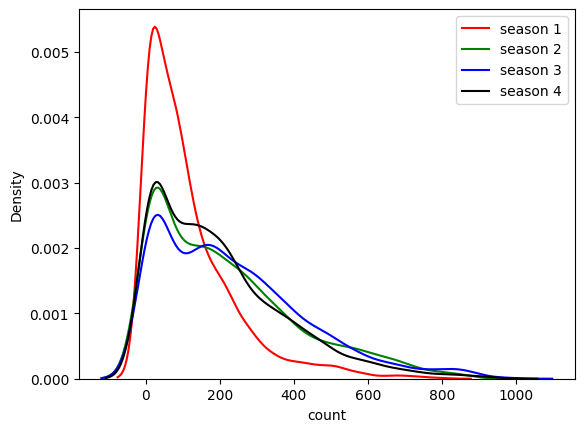

In [68]:
sns.kdeplot(a, color = "red", label = "season 1")
sns.kdeplot(b, color = 'green', label = "season 2")
sns.kdeplot(c, color = 'blue', label = "season 3")
sns.kdeplot(d, color = 'black', label = "season 4")
plt.legend()

## Visually it seems that ridership in season 1 is less as compared to other season. Let us prove this Mathematically using ANOVA test.

## Before we perform ANOVA test, let us check if the distribution is normal or not using Wilkin - Shapiro test.

In [69]:
from scipy.stats import shapiro

In [73]:
s_stat, p = shapiro(a)
if p<0.05: 
    print(f"p = {p}: Reject null hypothesis: Distribution is not normal")
else: 
    print(f"p = {p}: Failed to reject null hypothesis: Distribution is normal")

p = 0.0: Reject null hypothesis: Distribution is not normal


In [74]:
# Similarly if we perform shapiro test for all 4 datasets,
s_stat, p_b = shapiro(b)
s_stat, p_c = shapiro(c)
s_stat, p_d = shapiro(d)
p_b, p_c, p_d

(6.039093315091269e-39, 1.043458045587339e-36, 1.1301682309549298e-39)

## We observe that all 4 datasets do not show the charecteristics of normal distribution. Hence we need to perform Kruskal's test.

### Null Hypothesis: Number of people using the cycles is same across different seasons.

### Alternate Hypothesis: Number of people using the cycles is different for different seasons.

### Test: Kruskal's test

### significance level: 0.05

In [75]:
from scipy.stats import kruskal

In [76]:
kstat, p = kruskal(a, b, c, d)
if p<0.05:
    print(f"p = {p}: Reject null hypothesis")
else :
    print(f"p = {p}: failed to reject null hypothesis")

p = 2.479008372608633e-151: Reject null hypothesis


## We conclude that number of people using cycle is different for different seasons.

## Now let us test this using ANOVA test.

### Null Hypothesis: Number of people using the cycles is same across different seasons.

### Alternate Hypothesis: Number of people using the cycles is different for different seasons.

### Test: ANOVA

### significance level: 0.05

In [77]:
from scipy.stats import f_oneway

In [79]:
fstat, p = f_oneway(a, b, c, d)
if p<0.05:
    print(f"p = {p}: Reject null hypothesis")
else :
    print(f"p = {p}: failed to reject null hypothesis")

p = 6.164843386499654e-149: Reject null hypothesis


## Since p<<0.05, we will reject the null hypothesis and conclude that ridership is different at different seasons.

## 3. Does weather have any effect on ridership?

In [86]:
# First let us explore the datasets 
a = df.loc[df["weather"]==1,["count"]]["count"]
b = df.loc[df["weather"]==2,["count"]]["count"]
c = df.loc[df["weather"]==3,["count"]]["count"]
d = df.loc[df["weather"]==4,["count"]]["count"]

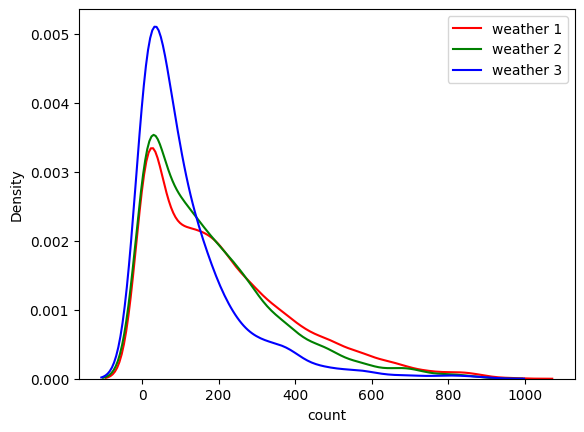

In [81]:
# Lets plot the data and check visually if they are same or different
sns.kdeplot(a, color = "red", label = "weather 1")
sns.kdeplot(b, color = 'green', label = "weather 2")
sns.kdeplot(c, color = 'blue', label = "weather 3")
sns.kdeplot(d, color = 'black', label = "weather 4")
plt.legend()
# Since weather 4 as only 1 data point, we get the curves for weather 1,2 and 3.

## Visually it seems that ridership in weather 3 is less as compared to other season. Let us prove this Mathematically using ANOVA test.

## Before we perform ANOVA test, let us check if the distribution is normal or not using Wilkin - Shapiro test.

In [83]:
s_stat, p = shapiro(a)
if p<0.05: 
    print(f"p = {p}: Reject null hypothesis: Distribution is not normal")
else: 
    print(f"p = {p}: Failed to reject null hypothesis: Distribution is normal")

p = 0.0: Reject null hypothesis: Distribution is not normal


In [84]:
# Similarly if we perform shapiro test for all 3 datasets,
s_stat, p_b = shapiro(b)
s_stat, p_c = shapiro(c)
p_b, p_c,

(9.781063280987223e-43, 3.876090133422781e-33)

## We observe that all 3 datasets do not show the charecteristics of normal distribution. Hence we need to perform Kruskal's test.

### Null Hypothesis: Number of people using the cycles is same across different weather.

### Alternate Hypothesis: Number of people using the cycles is different for different weather.

### Test: Kruskal's test

### significance level: 0.05

In [85]:
kstat, p = kruskal(a, b, c)
if p<0.05:
    print(f"p = {p}: Reject null hypothesis")
else :
    print(f"p = {p}: failed to reject null hypothesis")

p = 3.122066178659941e-45: Reject null hypothesis


## We conclude that number of people using cycle is different for different weather.

## Now let us test this using ANOVA test.

### Null Hypothesis: Number of people using the cycles is same across different weather.

### Alternate Hypothesis: Number of people using the cycles is different for different weather.

### Test: ANOVA test

### significance level: 0.05

In [87]:
fstat, p = f_oneway(a, b, c)
if p<0.05:
    print(f"p = {p}: Reject null hypothesis")
else :
    print(f"p = {p}: failed to reject null hypothesis")

p = 4.976448509904196e-43: Reject null hypothesis


## Since p<<0.05, we will reject the null hypothesis and conclude that ridership is different at different weather.

# 3. Is weather dependent on season?

In [88]:
# First let us explore the datasets 
a = pd.crosstab(df["season"], df["weather"])

In [89]:
a

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

## Now let us perform Chi-square test to check whether season is dependent on weather.

### Null Hypothesis: Weather is independent from season.

### Alternate Hypothesis: Weather is dependent on season.

### Test: Chi square test of independence

### significance level: 0.05

In [91]:
from scipy.stats import chi2_contingency

In [95]:
chi_stat, p, dof, exp_arr = chi2_contingency(a)
if p<0.05:
    print(f"p = {p}: Reject null hypothesis")
else :
    print(f"p = {p}: failed to reject null hypothesis")

p = 1.549925073686492e-07: Reject null hypothesis


## Since p<<0.05, we will reject the null hypothesis and conclude that weather is indeed dependent on season.